### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.python.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential

### Load NSL-KDD dataset


In [2]:
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
column_names = ["duration", "protocol_type", "service", "flag", "src_bytes",
                "dst_bytes", "land", "wrong_fragment", "urgent", "hot",
                "num_failed_logins", "logged_in", "num_compromised", "root_shell",
                "su_attempted", "num_root", "num_file_creations", "num_shells",
                "num_access_files", "num_outbound_cmds", "is_host_login",
                "is_guest_login", "count", "srv_count", "serror_rate",
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
                "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
                "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
                "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
                "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
                "dst_host_srv_serror_rate", "dst_host_rerror_rate",
                "dst_host_srv_rerror_rate", "label"]
df = pd.read_csv(url, names=column_names)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


### Drop non-numeric columns and label column

In [3]:
# Drop non-numeric columns and label column
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

### Heatmap of Correlation between Features


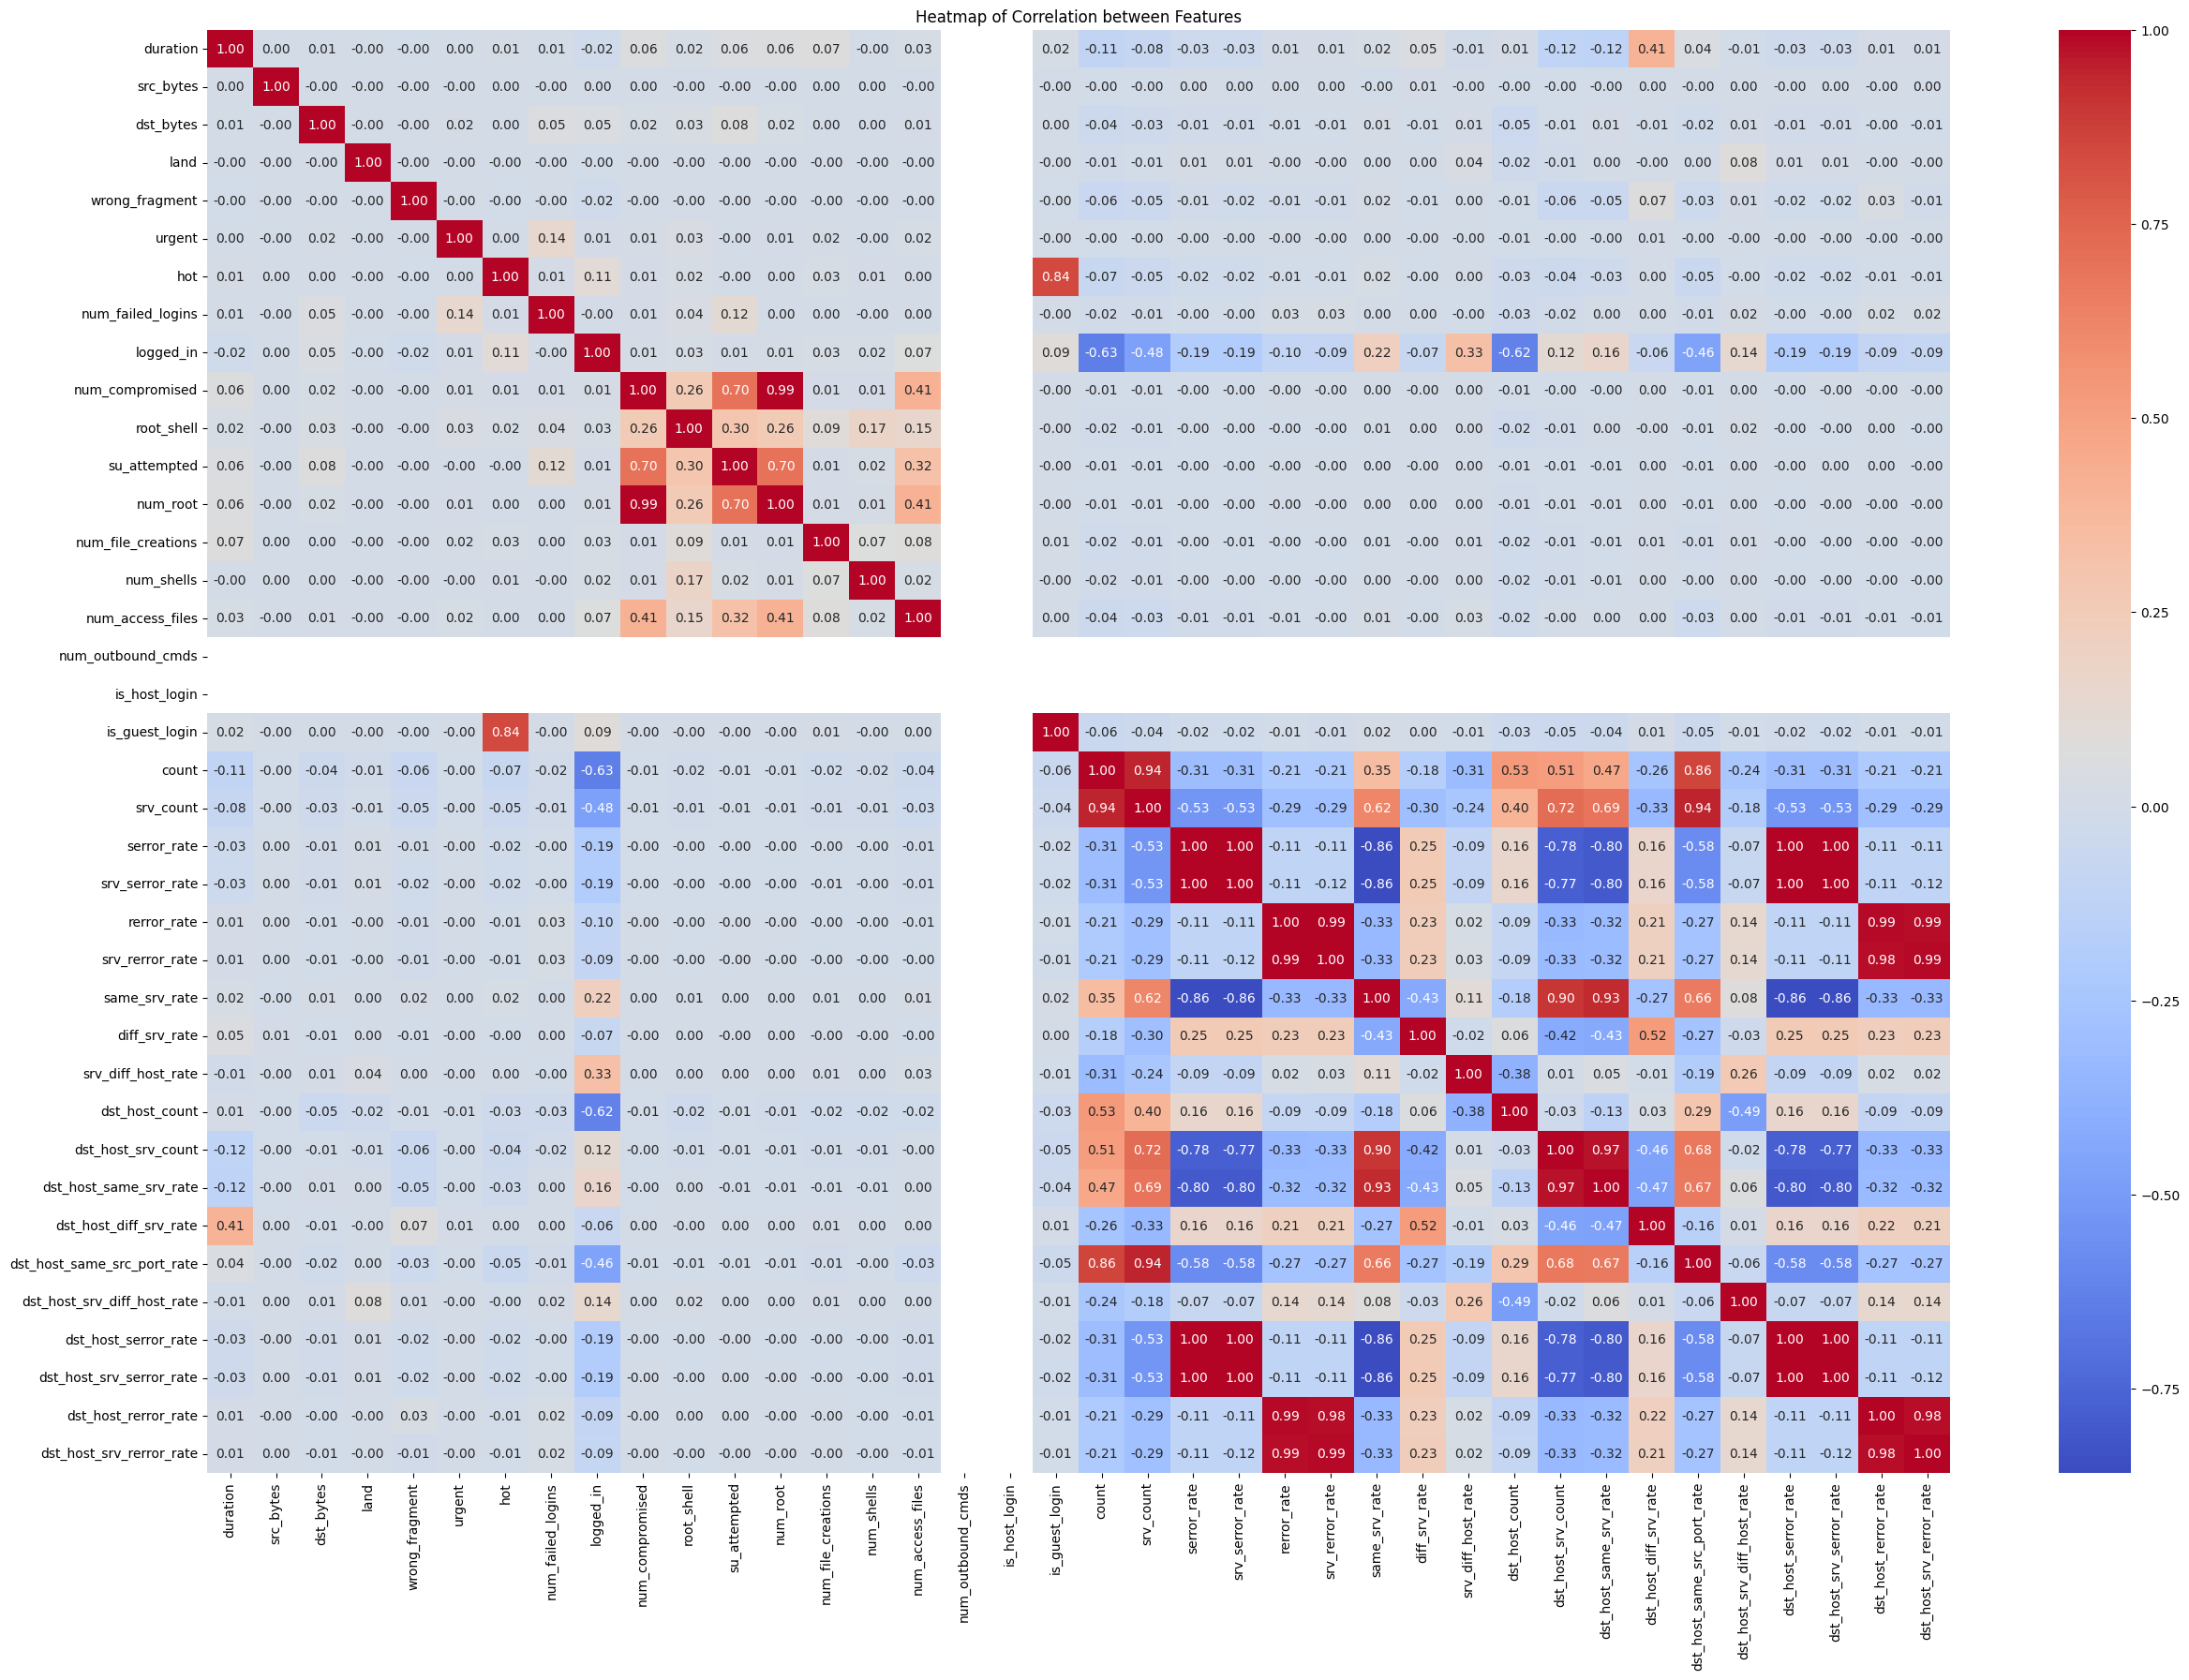

In [4]:
plt.figure(figsize=(30, 20))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation between Features')
plt.show()

### Data Pre-processing

In [5]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df_numeric)

# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

### Define the autoencoder model

In [6]:
model = Sequential([
    Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(20, activation='relu'),
    Dense(X_train.shape[1])
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

### Train the autoencoder

In [7]:
history = model.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

Epoch 1/50
12351/12351 [==============================] - 27s 2ms/step - loss: 0.3170 - val_loss: 0.2201
Epoch 2/50
12351/12351 [==============================] - 25s 2ms/step - loss: 0.2191 - val_loss: 0.1717
Epoch 3/50
12351/12351 [==============================] - 25s 2ms/step - loss: 0.1830 - val_loss: 0.1559
Epoch 4/50
12351/12351 [==============================] - 25s 2ms/step - loss: 0.1662 - val_loss: 0.1520
Epoch 5/50
12351/12351 [==============================] - 25s 2ms/step - loss: 0.1657 - val_loss: 0.1466
Epoch 6/50
12351/12351 [==============================] - 25s 2ms/step - loss: 0.1604 - val_loss: 0.1365
Epoch 7/50
12351/12351 [==============================] - 26s 2ms/step - loss: 0.1558 - val_loss: 0.1517
Epoch 8/50
12351/12351 [==============================] - 25s 2ms/step - loss: 0.1591 - val_loss: 0.1393
Epoch 9/50
12351/12351 [==============================] - 26s 2ms/step - loss: 0.1583 - val_loss: 0.1243
Epoch 10/50
12351/12351 [==============================

### Training and Validation Loss Over Epochs

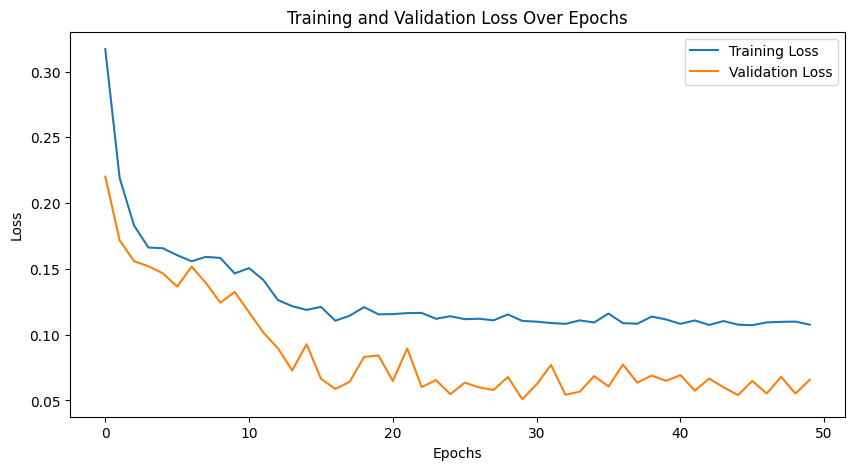

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Evaluating the model

In [9]:
# Use the trained autoencoder to encode and decode the test data
encoded_data = model.predict(X_test)

# Evaluate the reconstruction error
mse = np.mean(np.square(X_test - encoded_data))
print("Mean Squared Error:", mse)

Mean Squared Error: 0.06572151935927668


### Function to detect anomalies

In [10]:
# Function to detect anomalies
def detect_anomalies(X_test, threshold):
    reconstructed = model.predict(X_test)
    reconstruction_errors = np.mean(np.power(X_test - reconstructed, 2), axis=1)
    anomaly_indices = np.where(reconstruction_errors > threshold)[0]
    return anomaly_indices, reconstruction_errors

In [11]:
threshold = 0.3  
anomaly_indices, reconstruction_errors = detect_anomalies(X_test, threshold)
print("Anomaly indices:", anomaly_indices)
print("Reconstruction errors:", reconstruction_errors)

Anomaly indices: [  326   554   561   852   955  1177  1222  1226  1376  1389  1415  1540
  1731  2363  2566  2799  2889  2987  3178  3331  3488  3815  3932  3954
  3963  4164  4204  4220  4376  4464  4517  4521  4584  4624  4694  4907
  5213  5236  5301  5492  5673  5724  5825  5841  5875  6165  6416  6421
  6436  6621  6773  6856  6949  6974  7374  7536  7562  7752  8221  8230
  8234  8660  8725  8829  8937  9149  9198  9409  9412  9544  9547  9703
  9738  9758  9763 10111 10230 10260 10282 10610 10631 10641 10737 10841
 11401 11451 11655 12010 12140 12153 12199 12420 12505 12845 12929 13012
 13076 13110 13594 13620 13653 13753 13825 13913 13957 14500 14538 14747
 15077 15158 15186 15193 15448 15682 15734 15896 15949 16116 16209 16257
 16370 16600 16679 16730 16945 17088 17250 17314 17432 17480 17803 17859
 17941 17954 17955 17990 18166 18208 18400 18524 18538 18869 18932 19288
 19409 19440 19713 20074 20198 20388 20591 20667 20966 21030 21105 21403
 21408 21552 21580 21632 21996 221

In [22]:
# Train set predictions
train_pred = model.predict(X_train)
train_mse = np.mean(np.square(X_train - train_pred))

# Test set predictions
test_pred = model.predict(X_test)
test_mse = np.mean(np.square(X_test - test_pred))

print("Training Mean Squared Error:", train_mse)
print("Testing Mean Squared Error:", test_mse)

Training Mean Squared Error: 0.11020179590916247
Testing Mean Squared Error: 0.06572151935927668


### KNN model for comparison

c:\Users\saif_\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\saif_\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\saif_\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\saif_\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\saif_\miniconda3\lib\site-packages\sklearn\

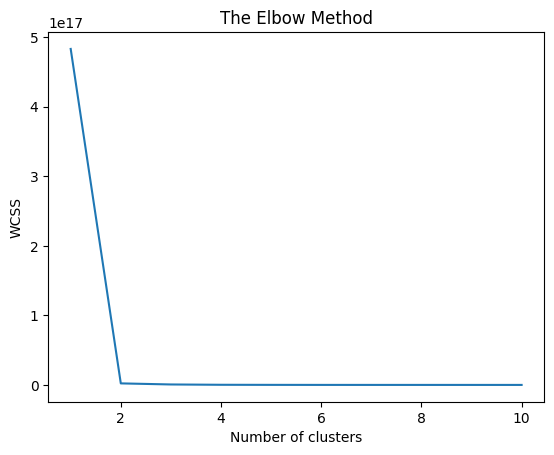

In [23]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_numeric)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
from sklearn.neighbors import NearestNeighbors


# Standardizing the data
scaler_knn = StandardScaler()
X_scaled = scaler_knn.fit_transform(df_numeric)

# Fit the KNN model
k = 2  # Number of neighbors
knn_model = NearestNeighbors(n_neighbors=k)
knn_model.fit(X_scaled)

# Calculate distances to k nearest neighbors for each instance
distances, _ = knn_model.kneighbors(X_scaled)

# Calculate the average distance to k nearest neighbors for each instance
avg_distances = np.mean(distances, axis=1)

# Set a threshold for anomaly detection (e.g., mean + 2 * standard deviation)
threshold = np.mean(avg_distances) + 2 * np.std(avg_distances)

# Identify anomalies based on the threshold
anomalies_indices = np.where(avg_distances > threshold)[0]
print("Indices of anomalies:", anomalies_indices)


Indices of anomalies: [   221    744    745    759    960   4026   4049   4113   6887   7601
   7607  11746  11790  13945  14584  15120  15699  15946  16064  19165
  21931  22750  22751  22772  22801  22827  22950  23235  23265  25708
  26534  26541  26559  26605  26606  26607  26691  26694  26700  26701
  26703  26706  26757  26765  26772  27298  29621  31193  31573  31590
  31636  31698  31737  32200  32211  35396  35407  35694  35708  36272
  39459  39522  39565  39573  39575  40723  41066  41521  41668  41675
  41714  41718  41721  41865  42057  42063  42995  43006  43007  43066
  43068  43172  43178  43187  52753  52916  53130  53131  74069  74072
  74092  74127  74196  74222  74384  74484  74499  75350  75355  76125
  76187  76265  76323  76324  76466  76622  76816  76820  76889  76894
  76962  77161  78154  78176  78281  78933  78968  80862  81951  82531
  83133  86158  86163  86165  86219  86244  86327  86890  87180  87233
  87238  88296  90843  91042  91617  91622 103874 10440

In [25]:
mse_unsupervised = np.mean(avg_distances ** 2)
print("Mean Squared Error (Unsupervised KNN):", mse_unsupervised)

Mean Squared Error (Unsupervised KNN): 0.39824518405233894


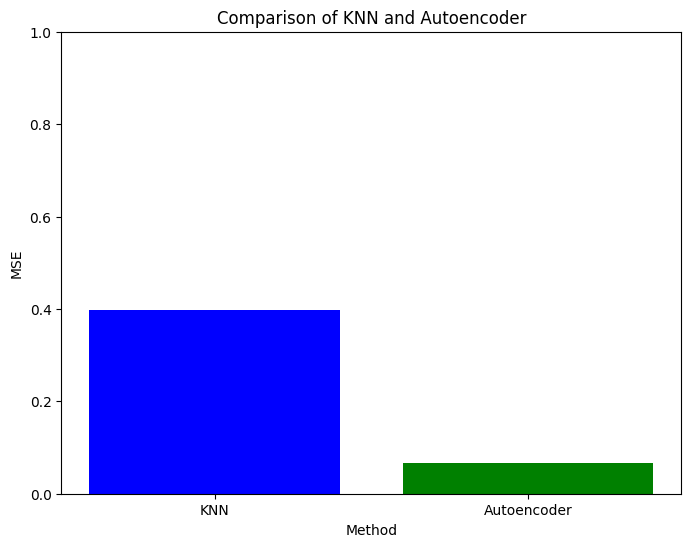

In [26]:
methods = ['KNN', 'Autoencoder']
accuracies = [mse_unsupervised, test_mse]

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(methods, accuracies, color=['blue', 'green'])
plt.title('Comparison of KNN and Autoencoder')
plt.xlabel('Method')
plt.ylabel('MSE')
plt.ylim(0, 1)  
plt.show()

### Scatter Plot of Reconstruction Errors vs. Data Indices


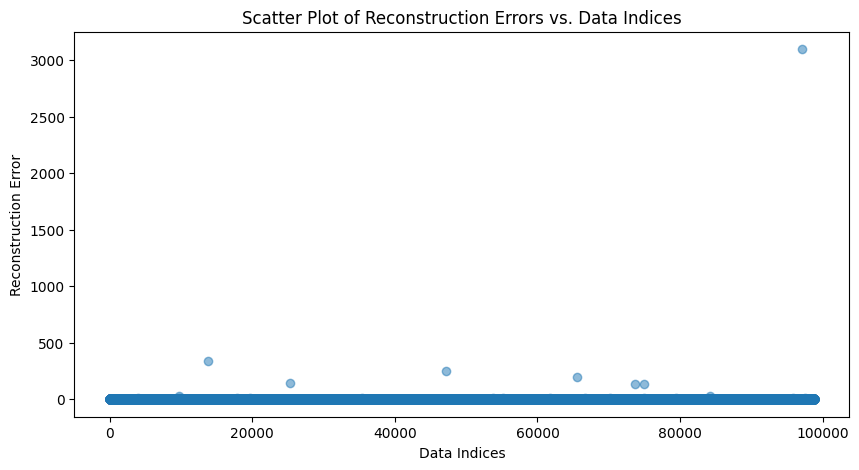

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(reconstruction_errors)), reconstruction_errors, alpha=0.5)
plt.title('Scatter Plot of Reconstruction Errors vs. Data Indices')
plt.xlabel('Data Indices')
plt.ylabel('Reconstruction Error')
plt.show()

### Threshold Line on Reconstruction Error Scatter Plot

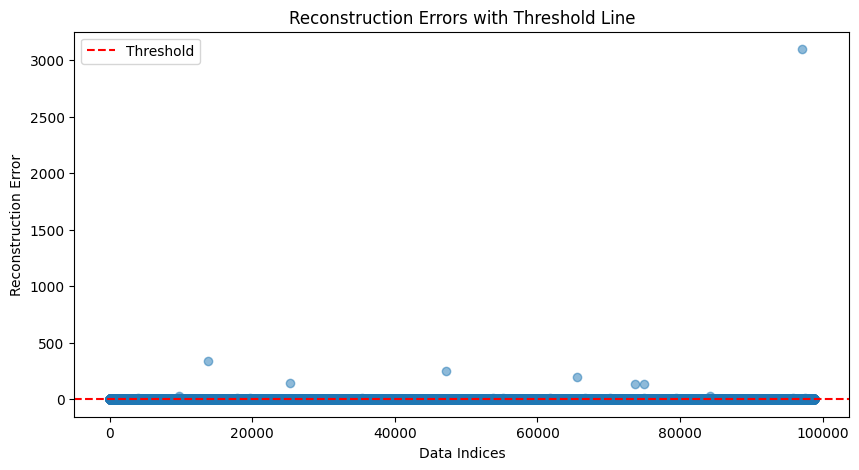

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(reconstruction_errors)), reconstruction_errors, alpha=0.5)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Reconstruction Errors with Threshold Line')
plt.xlabel('Data Indices')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()